In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
processed_data = pd.read_csv("../data/03_Processed/02_ProcessedData.csv")

In [3]:
processed_data.describe()

,ID,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,31.898305,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,2.847458,1.915254,...,1.406780,1.711864,1.457627,1.050847,1.627119,1.220339,1.338983,1.254237,1.389831,1.084746
std,18.630430,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,0.738441,0.836415,...,0.967019,1.145469,1.005537,0.917713,0.963082,0.929735,0.993256,0.901975,0.851306,0.876673
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,2.000000,2.000000,...,1.000000,1.000000,0.500000,0.000000,1.000000,0.000000,1.000000,0.500000,1.000000,0.500000
50%,31.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,47.500000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


In [4]:
processed_data.columns

Index(['ID', 'Uczestnictwo', 'Programming: R', 'Programming: Python',
       'Programming: Bash', 'Version Control: GIT', 'Containers: Docker',
       'CLI: (np. Bash, PowerShell, CMD)',
       'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL',
       'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC',
       'BI: PowerBI', 'BI: Tableau', 'Area: Time Series',
       'Area: Classical ML (Clustering, Regression, Classification)',
       'Area: NLP', 'Area: Computer Vision', 'Project Management',
       'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne',
       'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami',
       'Pozyskiwanie finansowania', 'Współpraca z administracją UEW',
       'FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR'],
      dtype='object')

In [5]:
selected_columns = processed_data[['Programming: R', 'Programming: Python',
       'Programming: Bash', 'Version Control: GIT', 'Containers: Docker',
       'CLI: (np. Bash, PowerShell, CMD)',
       'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL',
       'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC',
       'BI: PowerBI', 'BI: Tableau', 'Area: Time Series',
       'Area: Classical ML (Clustering, Regression, Classification)',
       'Area: NLP', 'Area: Computer Vision', 'Project Management',
       'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne',
       'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami',
       'Pozyskiwanie finansowania', 'Współpraca z administracją UEW',
       'FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']]

/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_3871/1088205858.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


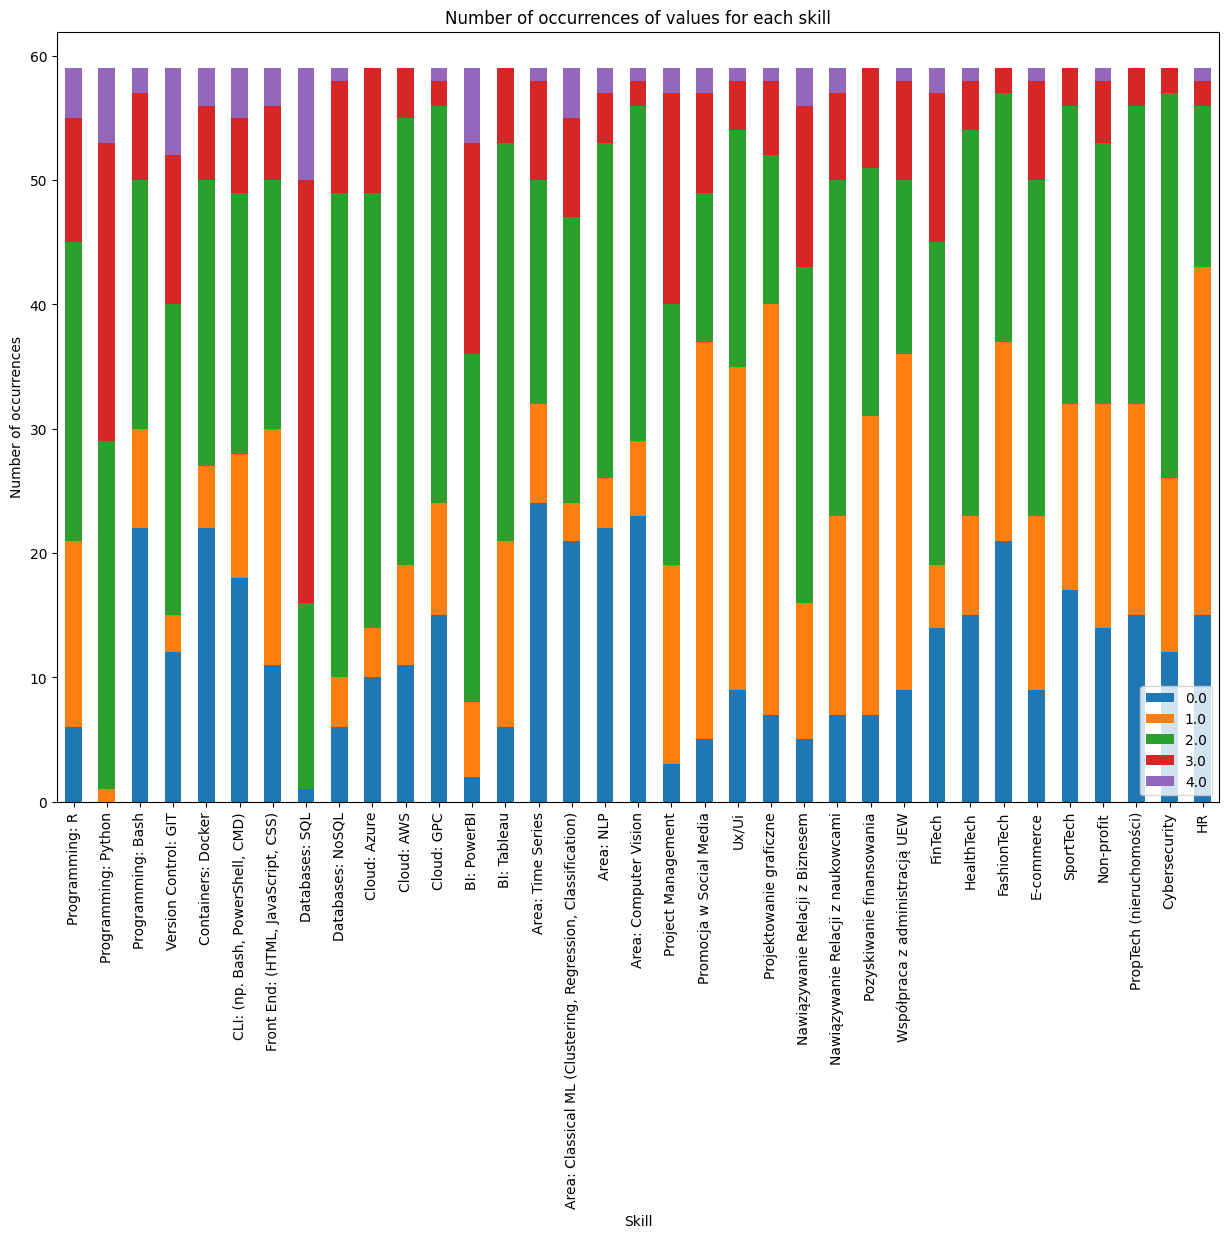

In [6]:
value_counts = selected_columns.apply(lambda x: x.value_counts()).T
ax = value_counts.plot(kind='bar', stacked=True, figsize=(15, 10), title='Number of occurrences of values for each skill')
ax.set_xlabel('Skill')
ax.set_ylabel('Number of occurrences')
ax.figure.savefig('../figures/03_NumberOfOccurrences.png', dpi=300,bbox_inches='tight')
ax.figure.show()

<Axes: >

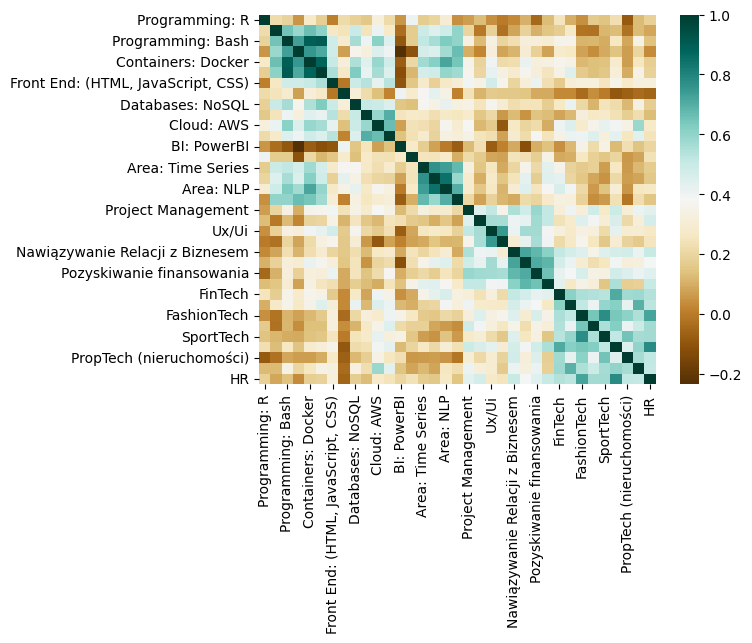

In [7]:
sns.heatmap(selected_columns.corr(),cmap='BrBG')

<Figure size 640x480 with 0 Axes>

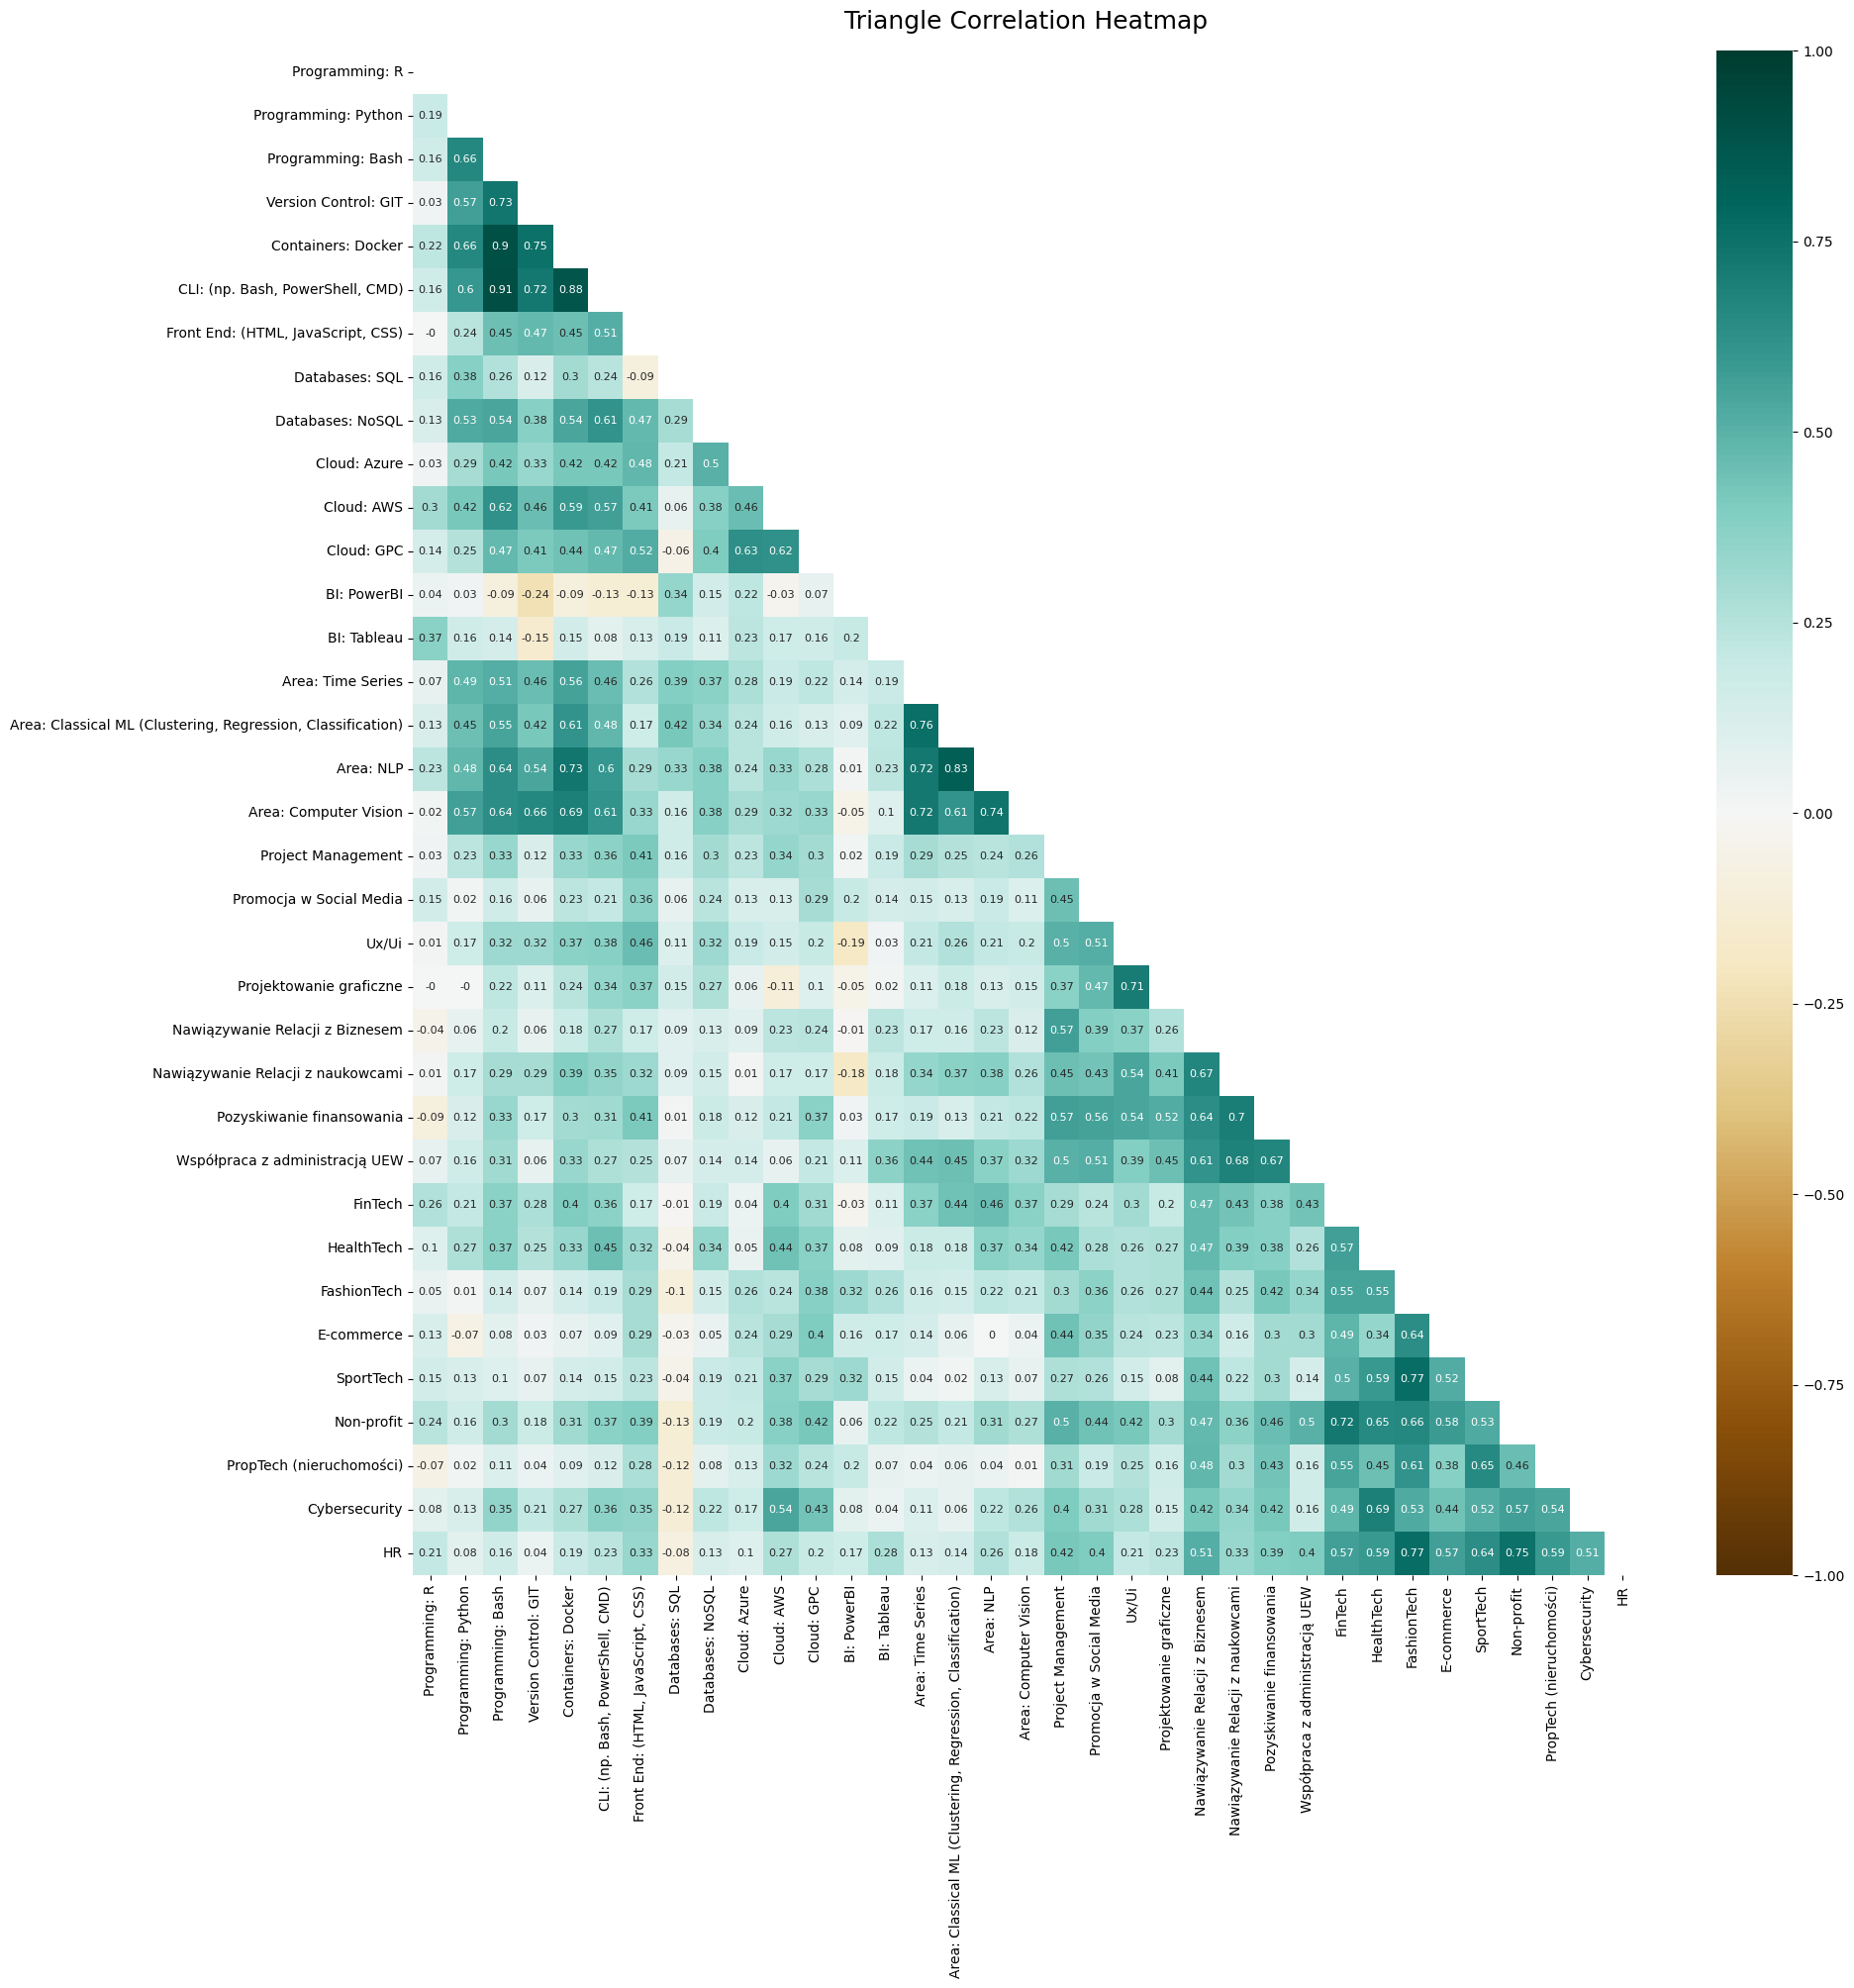

In [8]:
corr_matrix = selected_columns.corr(method='spearman')
corr_matrix=corr_matrix.round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 8})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.savefig('../figures/03_TriangleCorrelationHeatmap.png', dpi=300,bbox_inches='tight')
plt.show()